In [1]:
# Check free memory available
%system free -m

['              total        used        free      shared  buff/cache   available',
 'Mem:          15033        2626       11143           8        1264       12126',
 'Swap:             0           0           0']

In [2]:
#!pip install jupyterlab

In [3]:
#! pip install pandas_gbq

#! pip install import-ipynb #to import from other notebook files

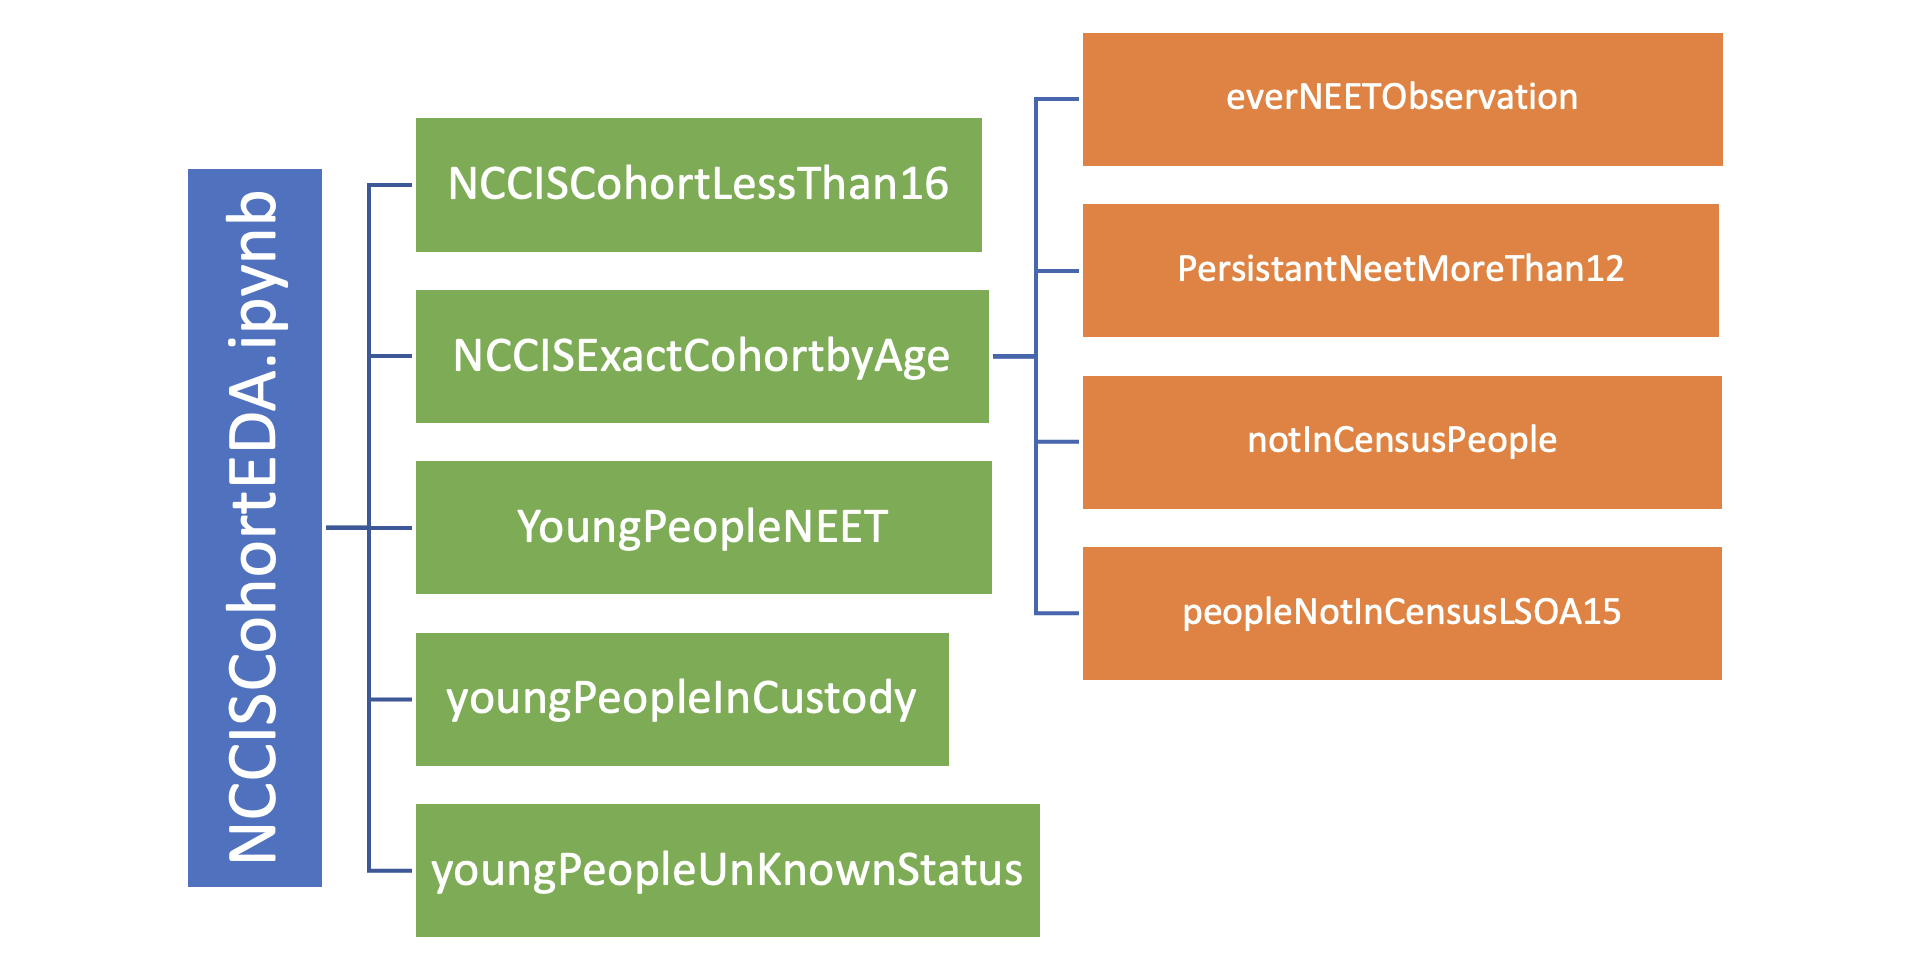

In [4]:
# Import required libraries
from google.cloud import bigquery
import gc
from dateutil.relativedelta import relativedelta
import numpy as np
import math
import os
import pandas_gbq as pdg
import pandas as pd
import matplotlib.pyplot as plt
#import import_ipynb
#import NCCISCohortEDA as nccis
import kaleido
import plotly.graph_objects as go
import plotly
# Interactive Plotly map 
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from shapely.geometry import Point, Polygon
import plotly.express as px
import warnings
style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [5]:
#PLOT_OUTPUT_LOCATION = "reports/figures/"
def returnPlotLocation():
    PLOT_OUTPUT_LOCATION = "reports/figures/"
    return PLOT_OUTPUT_LOCATION

In [6]:
def retINTERIM_DATA_LOCATION():
    INTERIM_DATA_LOCATION = "data/interim/"
    return INTERIM_DATA_LOCATION

In [7]:
def everNeetObservation():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "EverNEET16_18YAge.csv")

In [8]:
def PersistantNeetMoreThan12():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "PersistantNEET16_18YAge.csv")

<div class="alert alert-block alert-warning">
    <H2># Records are retrieved and filtered and taken from NEETCohort16To18.ipynb # </H2> <br>
    - Use appropriate functions to retrive dataframes of your interest and perform the necessary task call everNEETObservation()
</div>

In [9]:
everNEETCohort = everNeetObservation()

<div class="alert alert-block alert-warning">
     <H3> #This file works on NEET COHORT Explicitly #</H3> 
    
-- You can retrive various dataframe as needed for researches  
    1. <b> notInCensusPeople() </b> returns people who do not have records in Census table. If you want to make any research on them you can use this function to retrun the values of person_id <br>
2. <b>PersistantNeetMoreThan12() </b> - People who have been persistently NEET for more than 12 months Duration use this Dataframe <br>
3. <b>everNEETObservation()</b> - People have atleast 1 NEET Observation until 8 Observations use this Dataframe<br>
    4. <b>peopleNotInCensusLSOA15()</b> - People who do not have LSOA listed when their age was 15
</div>



<div class="alert alert-block alert-info">
<h3> # Ever NEET threshold is Total NEET Observation is more than 1 upto less than 8 observations # </h3> <br>
    - use the dataframe <b>everNEETObservation</b>
</div>

In [10]:
everNEETCohort

,person_id,CurrentActivityCode,academicyear,year_month_birth,gender,ethinicity,academic_start_date,academic_end_date,ever_neet_status,Learning_disability,...,custody_offender_observations,under_16_observations,status_unknown_observations,first_observation_date,last_observation_date,No_of_months_neet,Age,EverNeetStatus,total_observations,Rate_of_Neet
0,189,619,2012/2013,1994-11-15,M,White: English or Welsh or Scottish or Norther...,2012-09-01,2013-08-31,True,True,...,0,0,0,2012-11-30 00:00:00+00:00,2013-04-23 00:00:00+00:00,5,17,True,6,1.0
1,189,619,2011/2012,1994-11-15,M,White: English or Welsh or Scottish or Norther...,2011-09-01,2012-08-31,True,True,...,0,0,0,2011-10-27 00:00:00+00:00,2011-10-27 00:00:00+00:00,0,16,True,2,1.0
2,642,619,2013/2014,1997-04-15,M,White: English or Welsh or Scottish or Norther...,2013-09-01,2014-08-31,True,True,...,0,0,2,2013-09-01 00:00:00+00:00,2013-09-01 00:00:00+00:00,0,16,True,5,0.8
3,642,619,2013/2014,1997-04-15,M,White: English or Welsh or Scottish or Norther...,2013-09-01,2014-08-31,True,True,...,0,0,2,2014-04-30 00:00:00+00:00,2014-04-30 00:00:00+00:00,0,16,True,5,0.2
4,642,540,2013/2014,1997-04-15,M,White: English or Welsh or Scottish or Norther...,2013-09-01,2014-08-31,True,True,...,0,0,2,2014-04-30 00:00:00+00:00,2014-05-21 00:00:00+00:00,1,16,True,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26173,13763278,610,2010/2011,1993-06-15,F,White: English or Welsh or Scottish or Norther...,2010-09-01,2011-08-31,True,True,...,0,0,11,2010-10-18 00:00:00+00:00,2010-10-18 00:00:00+00:00,0,17,True,3,1.0
26174,13763466,619,2012/2013,1995-11-15,M,White: English or Welsh or Scottish or Norther...,2012-09-01,2013-08-31,True,True,...,0,0,7,2012-09-25 00:00:00+00:00,2012-09-25 00:00:00+00:00,0,16,True,2,1.0
26175,13763603,619,2012/2013,1996-03-15,M,White: English or Welsh or Scottish or Norther...,2012-09-01,2013-08-31,True,True,...,13,0,2,2012-07-18 00:00:00+00:00,2012-07-18 00:00:00+00:00,0,16,True,3,1.0
26176,13763934,619,2013/2014,1996-05-15,F,White: English or Welsh or Scottish or Norther...,2013-09-01,2014-08-31,True,True,...,0,0,10,2014-05-08 00:00:00+00:00,2014-05-08 00:00:00+00:00,0,17,True,2,1.0


# Selecting NEET COHORT by  filtering records having even one NEET Observations for a person

<div class="alert alert-block alert-info">
    <h3> # Persistent NEET threshold is No of months being NEET over 12 # </h3> <br>
    - use the dataframe <b> PersistantNeetMoreThan12</b>
</div>

In [11]:
PersistantNeetMoreThan12 = PersistantNeetMoreThan12()


In [12]:
cnt = PersistantNeetMoreThan12["person_id"].unique()
len(cnt)

2171

<div class="alert alert-block alert-success">
<h2> # For what Activity codes the NEET Observations are high and how many people are being NEET under this category #</h2>
</div>

In [13]:
observationNeetMoreThan1gp = PersistantNeetMoreThan12.groupby(["CurrentActivityCode"]).agg(
    {'total_neet_observations': 'max', 'No_of_months_neet': 'max', 'person_id':'nunique'})
observationNeetMoreThan1gp=observationNeetMoreThan1gp.reset_index()
observationNeetMoreThan1gp

,CurrentActivityCode,total_neet_observations,No_of_months_neet,person_id
0,510,3,13,4
1,520,10,15,85
2,530,6,10,7
3,540,9,15,31
4,610,12,20,137
5,611,4,16,10
6,612,5,19,13
7,613,7,9,10
8,614,7,12,5
9,615,3,10,11


<Figure size 640x480 with 0 Axes>

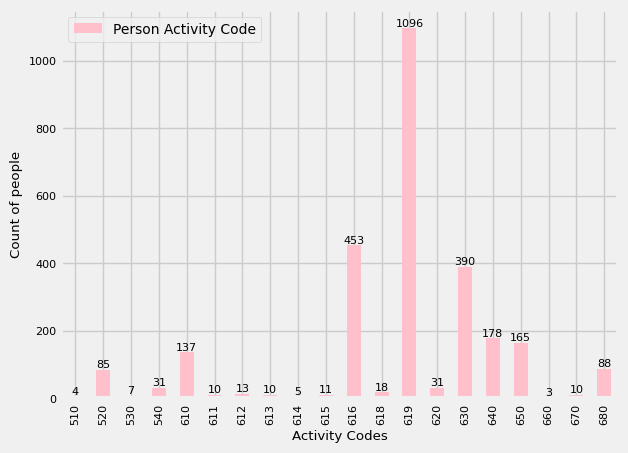

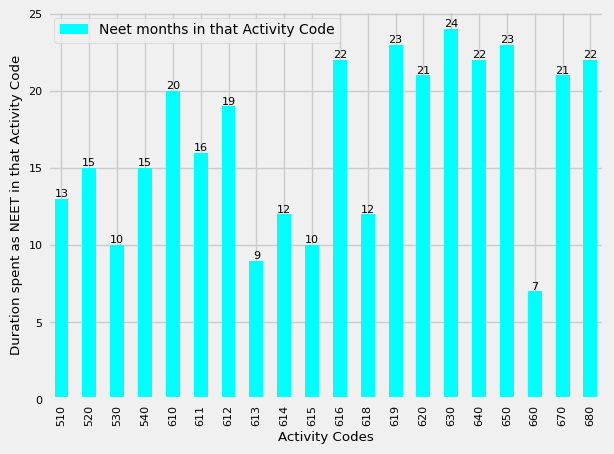

In [14]:
fig = plt.figure()
# Remove vertical space between axes
#fig.subplots_adjust(hspace=0)

plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = 8

ax = observationNeetMoreThan1gp.plot(kind='bar', x='CurrentActivityCode', y='person_id', label='Person Activity Code', color='pink')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Activity Codes')
ax.set_ylabel('Count of people')
ax.legend(loc='upper left', fontsize= 10)

plt.savefig(returnPlotLocation() + "PersistantNEET16to18/ActivityCodesVsCount", dpi=300)

bx = observationNeetMoreThan1gp.plot(kind='bar', x='CurrentActivityCode', y='No_of_months_neet', label='Neet months in that Activity Code', color='cyan')
bx.bar_label(bx.containers[0])
bx.set_xlabel('Activity Codes')
bx.set_ylabel('Duration spent as NEET in that Activity Code')
bx.legend(loc='upper left', fontsize= 10)

plt.savefig(returnPlotLocation() + "PersistantNEET16to18/ActivityCodesVsDuration", dpi=300)

<div class="alert alert-block alert-success">
<h2># Search in Census table for relevant data about these NEET people to understand their demograph #</h2><br>
1. Check for the LSOA if the last value is null take the available latest values for that person <br> 
2. Check if any FSMeligible, EverFSM6, EverFSM6P, EverFSMAll - Free School Meal <br>
3. InCareAtCurrentSchool Child in care <br>
4. Disability<br>
5. EYPPE, EYPPBF <br>
6. LSOA<br>
7. EYUEntitlement, EYEEntitlement, PPEntitlement, SBEntitlement Any Entitlements
</div>


In [15]:
personUniqueID = PersistantNeetMoreThan12["person_id"].unique()
ct=len(personUniqueID)
ct


2171

In [16]:
#pID = map(str, personUniqueID) 
Pid = tuple(personUniqueID)

In [17]:
sqlWideFormat = """ SELECT *
FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_census` 
WHERE person_id IN {} order by person_id, CensusDate""".format(Pid)

#sqlWideFormat

In [18]:
tableDBPersistantNEETLSOA = pdg.read_gbq(sqlWideFormat, dialect='standard')



Downloading: 100%|██████████|


In [19]:
tableDBPersistantNEETLSOA

,person_id,EDRN,PupilMatchingRefAnonymous,RecordStatus,AcademicYear,CensusDate,CensusTerm,OnRoll,SourceTable,Phase,...,QualHrs,NonQualHrs,MathsGCSEHighestPriorAttainment,MathsGCSEPriorAttainmentYearGroup,EnglishGCSEHighestPriorAttainment,EnglishGCSEPriorAttainmentYearGroup,MathsGCSEFundingExemption,EnglishGCSEFundingExemption,OpenPlacement,APType
0,189,4152439741A79876CF58CED5D612F,CCF851C833DFB8FBCD,NaN,2001/2002,2002-01-17 00:00:00+00:00,None,<NA>,PLASC02,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
1,189,4152439741A79876CF58CED5D612F,CCF851C833DFB8FBCD,NaN,2002/2003,2003-01-16 00:00:00+00:00,None,<NA>,PLASC03,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
2,189,4152439741A79876CF58CED5D612F,CCF851C833DFB8FBCD,NaN,2003/2004,2004-01-15 00:00:00+00:00,None,<NA>,PLASC04,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
3,189,4152439741A79876CF58CED5D612F,CCF851C833DFB8FBCD,NaN,2004/2005,2005-01-20 00:00:00+00:00,None,<NA>,PLASC05,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
4,189,4152439741A79876CF58CED5D612F,CCF851C833DFB8FBCD,NaN,2005/2006,2006-01-19 00:00:00+00:00,None,<NA>,SPR06,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45650,13763182,A12845AC9D369066109BC54E717227E3,CCF851C833D2B8F9C4,NaN,2010/2011,2011-01-20 00:00:00+00:00,Spring,True,SPR11,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
45651,13763182,A12845AC9D369066109BC54E717227E3,CCF851C833D2B8F9C4,NaN,2010/2011,2011-05-19 00:00:00+00:00,Summer,True,SUM11,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
45652,13763182,A12845AC9D369066109BC54E717227E3,CCF851C833D2B8F9C4,NaN,2011/2012,2011-10-06 00:00:00+00:00,Autumn,True,AUT12,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None
45653,13763182,A12845AC9D369066109BC54E717227E3,CCF851C833D2B8F9C4,NaN,2011/2012,2012-01-19 00:00:00+00:00,Spring,True,SPR12,None,...,NaN,NaN,None,NaN,None,NaN,None,None,<NA>,None


In [20]:
# column_names = list(tableDBWideFormat1.columns)
# column_names

In [21]:
censusRecordsPersistantNEET = tableDBPersistantNEETLSOA[["person_id","CensusDate","LSOA","AgeAtStartOfAcademicYear","FSMEligible","EverFSM6","EverFSM6P","EverFSMAll",
                                        "InCareAtCurrentSchool","Disability","EYPPE","EYPPBF","EYUEntitlement",
                                        "EYEEntitlement","PPEntitlement","SBEntitlement"]]

In [22]:
censusRecordsPersistantNEET

,person_id,CensusDate,LSOA,AgeAtStartOfAcademicYear,FSMEligible,EverFSM6,EverFSM6P,EverFSMAll,InCareAtCurrentSchool,Disability,EYPPE,EYPPBF,EYUEntitlement,EYEEntitlement,PPEntitlement,SBEntitlement
0,189,2002-01-17 00:00:00+00:00,E01010926,6.0,True,<NA>,<NA>,<NA>,<NA>,None,<NA>,None,NaN,NaN,NaN,NaN
1,189,2003-01-16 00:00:00+00:00,E01010618,7.0,True,<NA>,<NA>,<NA>,False,None,<NA>,None,NaN,NaN,NaN,NaN
2,189,2004-01-15 00:00:00+00:00,E01010618,8.0,False,<NA>,<NA>,<NA>,False,None,<NA>,None,NaN,NaN,NaN,NaN
3,189,2005-01-20 00:00:00+00:00,E01010618,9.0,True,<NA>,<NA>,<NA>,False,None,<NA>,None,NaN,NaN,NaN,NaN
4,189,2006-01-19 00:00:00+00:00,E01010618,10.0,False,<NA>,<NA>,<NA>,False,None,<NA>,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45650,13763182,2011-01-20 00:00:00+00:00,E01010890,15.0,False,False,<NA>,False,<NA>,NCOL,<NA>,None,NaN,NaN,NaN,NaN
45651,13763182,2011-05-19 00:00:00+00:00,None,15.0,True,<NA>,<NA>,<NA>,<NA>,None,<NA>,None,NaN,NaN,NaN,NaN
45652,13763182,2011-10-06 00:00:00+00:00,None,16.0,True,<NA>,<NA>,<NA>,<NA>,None,<NA>,None,NaN,NaN,NaN,NaN
45653,13763182,2012-01-19 00:00:00+00:00,E01010893,16.0,True,<NA>,<NA>,<NA>,<NA>,NCOL,<NA>,None,NaN,NaN,NaN,NaN


In [23]:
censusRecordsPersistantNEET.AgeAtStartOfAcademicYear.unique()

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,  3.,  4.,  5.,
       16.,  2., 17., 18.,  1.])

In [24]:
censusRecordsPersistantNEET.person_id.unique()

<IntegerArray>
[     189,     2122,     2326,     4611,     6766,     6846,     8677,
    19244,    21545,    21618,
 ...
 13756371, 13756631, 13757342, 13757743, 13758958, 13760287, 13761473,
 13762267, 13762786, 13763182]
Length: 2154, dtype: Int64

In [25]:
x = censusRecordsPersistantNEET.query("AgeAtStartOfAcademicYear >=0 & AgeAtStartOfAcademicYear <= 15")
x.person_id.unique()

<IntegerArray>
[     189,     2122,     2326,     4611,     6766,     6846,     8677,
    19244,    21545,    21618,
 ...
 13756371, 13756631, 13757342, 13757743, 13758958, 13760287, 13761473,
 13762267, 13762786, 13763182]
Length: 2154, dtype: Int64

<div class="alert alert-block alert-success">

<h2># Findings :- # </h2> <br>
1. No of  Persistant NEET COHORT 378 <br>
2. No of people recorded in census table 373 - Loosing 5 records <br>
3. No of People with LSOA listed when they were 15 - 341 (will loose data for 37 people) <br>

    
<b> # Finding Those Cohort who are present as NEET but do not have even one record in Census table notInCensusPeople #</b>
</div>

In [26]:
PersistantPeopleInCensus=pd.DataFrame(censusRecordsPersistantNEET["person_id"].unique(), columns=['person_id']).sort_values('person_id')
PersistantPeopleInNEETCohort=pd.DataFrame(personUniqueID,columns=['person_id'],).sort_values('person_id')
PersistantPeopleInCensus.set_index('person_id', inplace=True)
PersistantPeopleInNEETCohort.set_index('person_id', inplace=True)

notInCensusPersistantPeople=PersistantPeopleInNEETCohort[~PersistantPeopleInNEETCohort.index.isin(PersistantPeopleInCensus.index)]
# #df2[df1 != df2].dropna(how='all', axis=1).dropna(how='all', axis=0)
# len(dftest2)
#dftest3.dropna(inplace=True)
notInCensusPersistantPeople


""
person_id
31282
339976
736223
925620
12602543
12642402
12828159
12947394
13056997


In [27]:
censusRecordsPersistantNEET["FreeSchoolMeal"] = censusRecordsPersistantNEET.groupby('person_id').EverFSM6.transform('any') | censusRecordsPersistantNEET.EverFSM6P | censusRecordsPersistantNEET.EverFSMAll

censusRecordsPersistantNEET["EntitlementFlag"] = censusRecordsPersistantNEET.groupby('person_id').EYUEntitlement.transform('any') | censusRecordsPersistantNEET.EYEEntitlement | censusRecordsPersistantNEET.PPEntitlement | censusRecordsPersistantNEET.SBEntitlement

censusRecordsPersistantNEET = censusRecordsPersistantNEET[["person_id","CensusDate","AgeAtStartOfAcademicYear","LSOA","FSMEligible","InCareAtCurrentSchool","Disability","FreeSchoolMeal","EntitlementFlag"]]

#censusRecordsPersistantNEET

In [28]:
#censusRecordNEETDF.query("person_id == 13764032")

In [29]:
PersistantCensusNEETLSOA15GP = censusRecordsPersistantNEET.query("AgeAtStartOfAcademicYear == 15").groupby(["person_id"]).agg({
        'LSOA':lambda x: x.dropna().tail(1),
        'FSMEligible': lambda x: x.dropna().tail(1), 
        'InCareAtCurrentSchool': lambda x: x.dropna().tail(1),
        'Disability': lambda x: x.dropna().tail(1),
        'FreeSchoolMeal': lambda x: x.dropna().tail(1), 
        'EntitlementFlag': lambda x: x.dropna().tail(1)
    })

PersistantCensusNEETLSOA15GP=PersistantCensusNEETLSOA15GP.reset_index()
PersistantCensusNEETLSOA15GP

,person_id,LSOA,FSMEligible,InCareAtCurrentSchool,Disability,FreeSchoolMeal,EntitlementFlag
0,189,E01010618,False,[],NCOL,True,False
1,2122,E01027159,True,[],NCOL,True,False
2,2326,E01010977,True,[],[],True,False
3,4611,E01010808,True,False,[],[],False
4,6766,E01006946,False,False,[],[],False
...,...,...,...,...,...,...,...
1977,13760287,E01010829,False,False,[],True,False
1978,13761473,E01010720,True,[],[],True,False
1979,13762267,E01010760,False,[],NCOL,[],False
1980,13762786,[],True,[],[],[],False


<div class="alert alert-block alert-success">
    # If you do not wish to limit the LSOA at 15 use the below block of code#
</div>

In [30]:
PersistantPeopleWithLSOA15 = PersistantCensusNEETLSOA15GP[(PersistantCensusNEETLSOA15GP["LSOA"]!='[]')]
PersistantPeopleWithLSOA15

,person_id,LSOA,FSMEligible,InCareAtCurrentSchool,Disability,FreeSchoolMeal,EntitlementFlag
0,189,E01010618,False,[],NCOL,True,False
1,2122,E01027159,True,[],NCOL,True,False
2,2326,E01010977,True,[],[],True,False
3,4611,E01010808,True,False,[],[],False
4,6766,E01006946,False,False,[],[],False
...,...,...,...,...,...,...,...
1976,13758958,E01010682,True,[],[],True,False
1977,13760287,E01010829,False,False,[],True,False
1978,13761473,E01010720,True,[],[],True,False
1979,13762267,E01010760,False,[],NCOL,[],False


In [31]:
PersistantPeopleInCensusNEET=pd.DataFrame(PersistantCensusNEETLSOA15GP["person_id"].unique(), columns=['person_id']).sort_values('person_id')
PersistantPeopleInCohortLSOA15=pd.DataFrame(PersistantPeopleWithLSOA15["person_id"].unique(), columns=['person_id']).sort_values('person_id')
PersistantPeopleInCensusNEET.set_index('person_id', inplace=True)
PersistantPeopleInCohortLSOA15.set_index('person_id', inplace=True)
PersistantPeopleNotInCensusLSOA15=PersistantPeopleInCensusNEET[~PersistantPeopleInCensusNEET.index.isin(PersistantPeopleInCohortLSOA15.index)]
PersistantPeopleNotInCensusLSOA15

""
person_id
21545
59321
85231
282651
328916
...
13703903
13706220
13739246


<div class="alert alert-block alert-success">
<b># There are close to 31 records than has missing LSOA when they were 15. Retrieve these people using peopleNotInCensusLSOA</b>
</div>


In [32]:
PersistantPeopleWithLSOA15.info()

LSOAUniq = PersistantPeopleWithLSOA15['LSOA'].apply(lambda x: str(x))
PersistantPeopleWithLSOA15['LSOA']= PersistantPeopleWithLSOA15['LSOA'].apply(lambda x: str(x))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1981
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              1844 non-null   int64  
 1   LSOA                   1844 non-null   object 
 2   FSMEligible            1844 non-null   boolean
 3   InCareAtCurrentSchool  1844 non-null   object 
 4   Disability             1844 non-null   object 
 5   FreeSchoolMeal         1844 non-null   object 
 6   EntitlementFlag        1844 non-null   bool   
dtypes: bool(1), boolean(1), int64(1), object(4)
memory usage: 91.8+ KB


# For all the LSOA listed get its corresponding details from the lookup tbl_lsoa_boundaries

In [33]:
LSOA_subset_codes = tuple(LSOAUniq)

In [34]:
QUERY_BY_LSOA_SUBSET =  """ SELECT LSOA_code as LSOA, LSOA_name, geometry as geometry_home, 
lat_long FROM `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_lsoa_boundaries` WHERE LSOA_code IN {}""".format(LSOA_subset_codes[1:-1])

In [35]:
#QUERY_BY_LSOA_SUBSET

In [36]:
tablePersistantLSOA = pdg.read_gbq(QUERY_BY_LSOA_SUBSET, dialect='standard')
tablePersistantLSOA1 = tablePersistantLSOA

Downloading: 100%|██████████|


In [37]:
#tableLSOA

In [38]:
#censusRecordNEETwithLSOA = pd.merge(censusRecordsNEETGP,tableLSOA,on='LSOA',how='left')
PersistantCensusRecordNEETwithLSOA = pd.merge(PersistantPeopleWithLSOA15,tablePersistantLSOA,on='LSOA',how='left')
#censusRecordNEETwithLSOA

In [39]:
PersistantNeetMoreThan12BFMerge = PersistantNeetMoreThan12[["person_id","CurrentActivityCode","year_month_birth","Age","gender","ethinicity","academic_start_date","total_neet_observations","custody_offender_observations","status_unknown_observations"]].sort_values("person_id")

In [40]:
PersistantNEETCohortAfterMerge = pd.merge(PersistantNeetMoreThan12BFMerge,PersistantCensusRecordNEETwithLSOA,on='person_id',how='left')
#NEETStatusCohortAfterMerge.query("CurrentActivityCode != 619")
PersistantNEETCohortAfterMerge

,person_id,CurrentActivityCode,year_month_birth,Age,gender,ethinicity,academic_start_date,total_neet_observations,custody_offender_observations,status_unknown_observations,LSOA,FSMEligible,InCareAtCurrentSchool,Disability,FreeSchoolMeal,EntitlementFlag,LSOA_name,geometry_home,lat_long
0,189,619,1994-11-15,17,M,White: English or Welsh or Scottish or Norther...,2012-09-01,6,0,0,E01010618,False,[],NCOL,True,False,Bradford 038A,"POLYGON((-1.71162851108778 53.8001348339413, -...",POINT(-1.71162 53.7977)
1,2122,630,1995-08-15,17,F,Unknown/Refuse to say,2012-09-01,6,0,0,E01027159,True,[],NCOL,True,False,Northampton 027B,"POLYGON((-0.89622629479458 52.2257107768013, -...",POINT(-0.89498 52.2202)
2,2122,616,1995-08-15,16,F,Unknown/Refuse to say,2011-09-01,1,0,0,E01027159,True,[],NCOL,True,False,Northampton 027B,"POLYGON((-0.89622629479458 52.2257107768013, -...",POINT(-0.89498 52.2202)
3,2122,619,1995-08-15,16,F,Unknown/Refuse to say,2011-09-01,2,0,0,E01027159,True,[],NCOL,True,False,Northampton 027B,"POLYGON((-0.89622629479458 52.2257107768013, -...",POINT(-0.89498 52.2202)
4,2326,619,1997-11-15,16,M,White: English or Welsh or Scottish or Norther...,2014-09-01,3,0,1,E01010977,True,[],[],True,False,Calderdale 016D,"POLYGON((-1.89170433728701 53.7149475349506, -...",POINT(-1.88448 53.7082)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,13762267,619,1996-04-15,16,M,Unknown/Refuse to say,2012-09-01,10,0,0,E01010760,False,[],NCOL,[],False,Bradford 058G,"POLYGON((-1.84944355397975 53.7644256024382, -...",POINT(-1.85707 53.7588)
3417,13762786,540,1994-12-15,17,M,White: English or Welsh or Scottish or Norther...,2012-09-01,4,0,2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3418,13762786,616,1994-12-15,17,M,White: English or Welsh or Scottish or Norther...,2012-09-01,2,0,2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419,13762786,630,1994-12-15,17,M,White: English or Welsh or Scottish or Norther...,2012-09-01,2,0,2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
PersistantNEETCohortAfterMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 0 to 3420
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_id                      3421 non-null   int64  
 1   CurrentActivityCode            3421 non-null   int64  
 2   year_month_birth               3421 non-null   object 
 3   Age                            3421 non-null   int64  
 4   gender                         3421 non-null   object 
 5   ethinicity                     3421 non-null   object 
 6   academic_start_date            3421 non-null   object 
 7   total_neet_observations        3421 non-null   int64  
 8   custody_offender_observations  3421 non-null   int64  
 9   status_unknown_observations    3421 non-null   int64  
 10  LSOA                           2835 non-null   object 
 11  FSMEligible                    2835 non-null   boolean
 12  InCareAtCurrentSchool          2835 non-null   o

In [42]:

PersistantNEETCohortAfterMerge.to_csv(retINTERIM_DATA_LOCATION() + "PersistantNEETLSOA.csv", index=False)
df = PersistantNEETCohortAfterMerge.astype(str)
df.info()
df.to_gbq('yhcr-prd-phm-bia-core.CB_MYSPACE_RT.PersistantNEETLSOA', 
                 chunksize=None, # I have tried with several chunk sizes, it runs faster when it's one big chunk 
                 if_exists='replace'
                 )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 0 to 3420
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   person_id                      3421 non-null   object
 1   CurrentActivityCode            3421 non-null   object
 2   year_month_birth               3421 non-null   object
 3   Age                            3421 non-null   object
 4   gender                         3421 non-null   object
 5   ethinicity                     3421 non-null   object
 6   academic_start_date            3421 non-null   object
 7   total_neet_observations        3421 non-null   object
 8   custody_offender_observations  3421 non-null   object
 9   status_unknown_observations    3421 non-null   object
 10  LSOA                           3421 non-null   object
 11  FSMEligible                    3421 non-null   object
 12  InCareAtCurrentSchool          3421 non-null   object
 13  Dis

100%|██████████| 1/1 [00:00<00:00, 8630.26it/s]


In [43]:
ct1 = PersistantNEETCohortAfterMerge.person_id.unique()
len(ct1)

2171

In [44]:
# Geospatial analysis
import geopandas as gpd
#import cartopy as ccrs
import contextily as cx

# Visualisation
from matplotlib import font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from shapely.geometry import Point
import seaborn as sns

import kaleido
import plotly.express as px
import plotly.io as pio

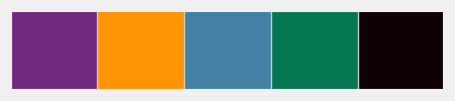

In [45]:
# Plotting config
pio.orca.config.executable = '/path/to/orca'
pio.orca.config.save()

# Define palettes
pal_full = ["#71297d","#ff9505","#4281a4","#057652","#0e0004"]
pal_gender = dict(F="#71297D" , M="#FF9505")
pal_school = dict(Primary="#71297D" , Secondary="#FF9505")
pal_auth_unauth = dict(Authorised="#71297D" , Unauthorised="#FF9505")

# Print palette
sns.palplot(sns.color_palette(pal_full))

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal_full)

# Set Seaborn defaults
sns.set(
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'grid.color': 'lightgrey',
 'axes.axisbelow': True,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False,
}
)

sns.set_context("notebook", rc={"font.size":18,
                                "axes.titlesize":22,
                                "axes.labelsize":20})

In [46]:
# Matplotlib/Seaborn custom font check
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("Plus Jakarta Sans") # Test with "Special Elite" too

findfont: Font family ['Plus Jakarta Sans'] not found. Falling back to DejaVu Sans.


'/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

<div class="alert alert-block alert-success">
<h2> # Filtering records pertaining to Bradford only ans Age of the student when they were 16 with LSOA at 15 #</h2>
</div>



In [47]:
# PersistantDFE16Brasford = PersistantNEETCohortAfterMerge.query('LSOA_name.str.contains("Bradford") & Age == 16', engine='python')
# PersistantDFE16Brasford

PersistantDFE16Brasford = PersistantNEETCohortAfterMerge.query('LSOA_name.str.contains("Bradford") & Age >= 16', engine='python')
PersistantDFE16Brasford

,person_id,CurrentActivityCode,year_month_birth,Age,gender,ethinicity,academic_start_date,total_neet_observations,custody_offender_observations,status_unknown_observations,LSOA,FSMEligible,InCareAtCurrentSchool,Disability,FreeSchoolMeal,EntitlementFlag,LSOA_name,geometry_home,lat_long
0,189,619,1994-11-15,17,M,White: English or Welsh or Scottish or Norther...,2012-09-01,6,0,0,E01010618,False,[],NCOL,True,False,Bradford 038A,"POLYGON((-1.71162851108778 53.8001348339413, -...",POINT(-1.71162 53.7977)
6,4611,620,1993-08-15,17,F,Unknown/Refuse to say,2010-09-01,8,0,8,E01010808,True,False,[],[],False,Bradford 033D,"POLYGON((-1.78588907633806 53.809762385, -1.78...",POINT(-1.78485 53.8071)
9,6846,619,2001-08-15,17,M,Asian or Asian British: Pakistani - England an...,2018-09-01,2,0,0,E01010828,False,[],[],False,False,Bradford 035A,"POLYGON((-1.72722994322482 53.8116274776572, -...",POINT(-1.73262 53.8086)
10,6846,616,2001-08-15,16,M,Asian or Asian British: Pakistani - England an...,2017-09-01,3,0,0,E01010828,False,[],[],False,False,Bradford 035A,"POLYGON((-1.72722994322482 53.8116274776572, -...",POINT(-1.73262 53.8086)
12,19244,616,1997-01-15,16,M,White: English or Welsh or Scottish or Norther...,2013-09-01,2,0,0,E01010599,False,[],[],[],False,Bradford 028C,"POLYGON((-1.75183415165545 53.8178385713611, -...",POINT(-1.75284 53.8157)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,13758958,619,1997-04-15,17,M,White: English or Welsh or Scottish or Norther...,2014-09-01,6,0,2,E01010682,True,[],[],True,False,Bradford 019C,"POLYGON((-1.71562788712381 53.8327686945583, -...",POINT(-1.71844 53.8289)
3413,13760287,520,1994-05-15,17,M,Asian or Asian British: Pakistani - England an...,2011-09-01,1,0,0,E01010829,False,False,[],True,False,Bradford 035B,"POLYGON((-1.73936749905656 53.8109301391841, -...",POINT(-1.74167 53.806)
3414,13761473,630,1999-11-15,16,F,White: English or Welsh or Scottish or Norther...,2016-09-01,8,0,0,E01010720,True,[],[],True,False,Bradford 009B,"POLYGON((-1.9235093626086 53.8720892544385, -1...",POINT(-1.92751 53.8689)
3415,13762267,619,1996-04-15,17,M,Unknown/Refuse to say,2013-09-01,12,0,0,E01010760,False,[],NCOL,[],False,Bradford 058G,"POLYGON((-1.84944355397975 53.7644256024382, -...",POINT(-1.85707 53.7588)


In [48]:
# PersistantDFE16Brasford = PersistantDFE16Brasford.groupby(['academic_start_date','LSOA'], as_index=False).agg({
#         # 'academic_start_date':'max',
#         # 'LSOA':'count',
#         'LSOA_name':'max',
#         'geometry_home':'max',
#         'total_neet_observations': 'sum',
#         'custody_offender_observations': 'sum',
#         'status_unknown_observations': 'sum',
#         'CountofPeople': 'nunique'}).assign(NEETObservationRatio = lambda df: df["total_neet_observations"] / df["CountofPeople"],
#                                          CustodyOffenderRatio = lambda df: df["custody_offender_observations"] / df["CountofPeople"],
#                                          StatusUnknownRatio = lambda df: df["status_unknown_observations"] / df["CountofPeople"] )

In [49]:
PersistantDFE16Brasfordgp = PersistantDFE16Brasford.groupby(['person_id','academic_start_date'], as_index=False).agg({
        'LSOA':'max',
        'LSOA_name':'max',
        'geometry_home':'max',
        'total_neet_observations': 'sum',
        'custody_offender_observations': 'sum',
        'status_unknown_observations': 'sum'})

PersistantDFE16Brasfordgp

#PersistantDFE16Brasfordgp = PersistantDFE16Brasfordgp..drop_duplicates()
#PersistantDFE16Brasford.drop(['CurrentActivityCode'])
#PersistantDFE16Brasford.groupby(['LSOA'], as_index=False).agg({
        # 'academic_start_date':'max',
        # 'LSOA':'count',

,person_id,academic_start_date,LSOA,LSOA_name,geometry_home,total_neet_observations,custody_offender_observations,status_unknown_observations
0,189,2012-09-01,E01010618,Bradford 038A,"POLYGON((-1.71162851108778 53.8001348339413, -...",6,0,0
1,4611,2010-09-01,E01010808,Bradford 033D,"POLYGON((-1.78588907633806 53.809762385, -1.78...",8,0,8
2,6846,2017-09-01,E01010828,Bradford 035A,"POLYGON((-1.72722994322482 53.8116274776572, -...",3,0,0
3,6846,2018-09-01,E01010828,Bradford 035A,"POLYGON((-1.72722994322482 53.8116274776572, -...",2,0,0
4,19244,2013-09-01,E01010599,Bradford 028C,"POLYGON((-1.75183415165545 53.8178385713611, -...",2,0,0
...,...,...,...,...,...,...,...,...
1583,13758958,2014-09-01,E01010682,Bradford 019C,"POLYGON((-1.71562788712381 53.8327686945583, -...",6,0,2
1584,13760287,2011-09-01,E01010829,Bradford 035B,"POLYGON((-1.73936749905656 53.8109301391841, -...",1,0,0
1585,13761473,2016-09-01,E01010720,Bradford 009B,"POLYGON((-1.9235093626086 53.8720892544385, -1...",8,0,0
1586,13762267,2012-09-01,E01010760,Bradford 058G,"POLYGON((-1.84944355397975 53.7644256024382, -...",10,0,0


In [50]:
PersistantDFE16Brasfordgp["CountofPeople"] = PersistantDFE16Brasfordgp["person_id"] 



In [51]:
PersistantDFE16Brasfordgp = PersistantDFE16Brasfordgp.groupby(['LSOA'], as_index=False).agg({
#         # 'academic_start_date':'max',
#         # 'LSOA':'count',
        'LSOA_name':'max',
        'geometry_home':'max',
        'total_neet_observations': 'sum',
        'custody_offender_observations': 'sum',
        'status_unknown_observations': 'sum',
        'CountofPeople': 'count'}).assign(NEETObservationRatio = lambda df: df["total_neet_observations"] / df["CountofPeople"],
                                         CustodyOffenderRatio = lambda df: df["custody_offender_observations"] / df["CountofPeople"],
                                         StatusUnknownRatio = lambda df: df["status_unknown_observations"] / df["CountofPeople"] )

In [57]:
#DFE16Brasford['LSOA'].value_counts().index[:10]
PersistantDFE16Brasfordgp

,LSOA,LSOA_name,geometry_home,total_neet_observations,custody_offender_observations,status_unknown_observations,CountofPeople,NEETObservationRatio,CustodyOffenderRatio,StatusUnknownRatio
0,E01010568,Bradford 016A,"POLYGON((-1.75223103716984 53.8503258605583, -...",5,0,0,1,5.000000,0.000000,0.000000
1,E01010569,Bradford 016B,"POLYGON((-1.76783482324601 53.8490572093718, -...",8,0,2,1,8.000000,0.000000,2.000000
2,E01010570,Bradford 018A,"POLYGON((-1.78862483951544 53.8504855511079, -...",15,2,4,2,7.500000,1.000000,2.000000
3,E01010571,Bradford 016C,"POLYGON((-1.76182748529313 53.8439194954512, -...",12,0,11,3,4.000000,0.000000,3.666667
4,E01010572,Bradford 016D,"POLYGON((-1.76418163133864 53.8487935123579, -...",13,0,26,2,6.500000,0.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...
260,E01033693,Bradford 039J,"POLYGON((-1.75652766167913 53.8094317766972, -...",40,3,13,7,5.714286,0.428571,1.857143
261,E01033694,Bradford 020F,"POLYGON((-1.78454552564587 53.8394510677526, -...",5,0,1,1,5.000000,0.000000,1.000000
262,E01033695,Bradford 049H,"POLYGON((-1.81009521951767 53.7717765093753, -...",10,0,2,2,5.000000,0.000000,1.000000
263,E01033696,Bradford 049I,"POLYGON((-1.82027393334951 53.7767245004703, -...",1,0,4,1,1.000000,0.000000,4.000000


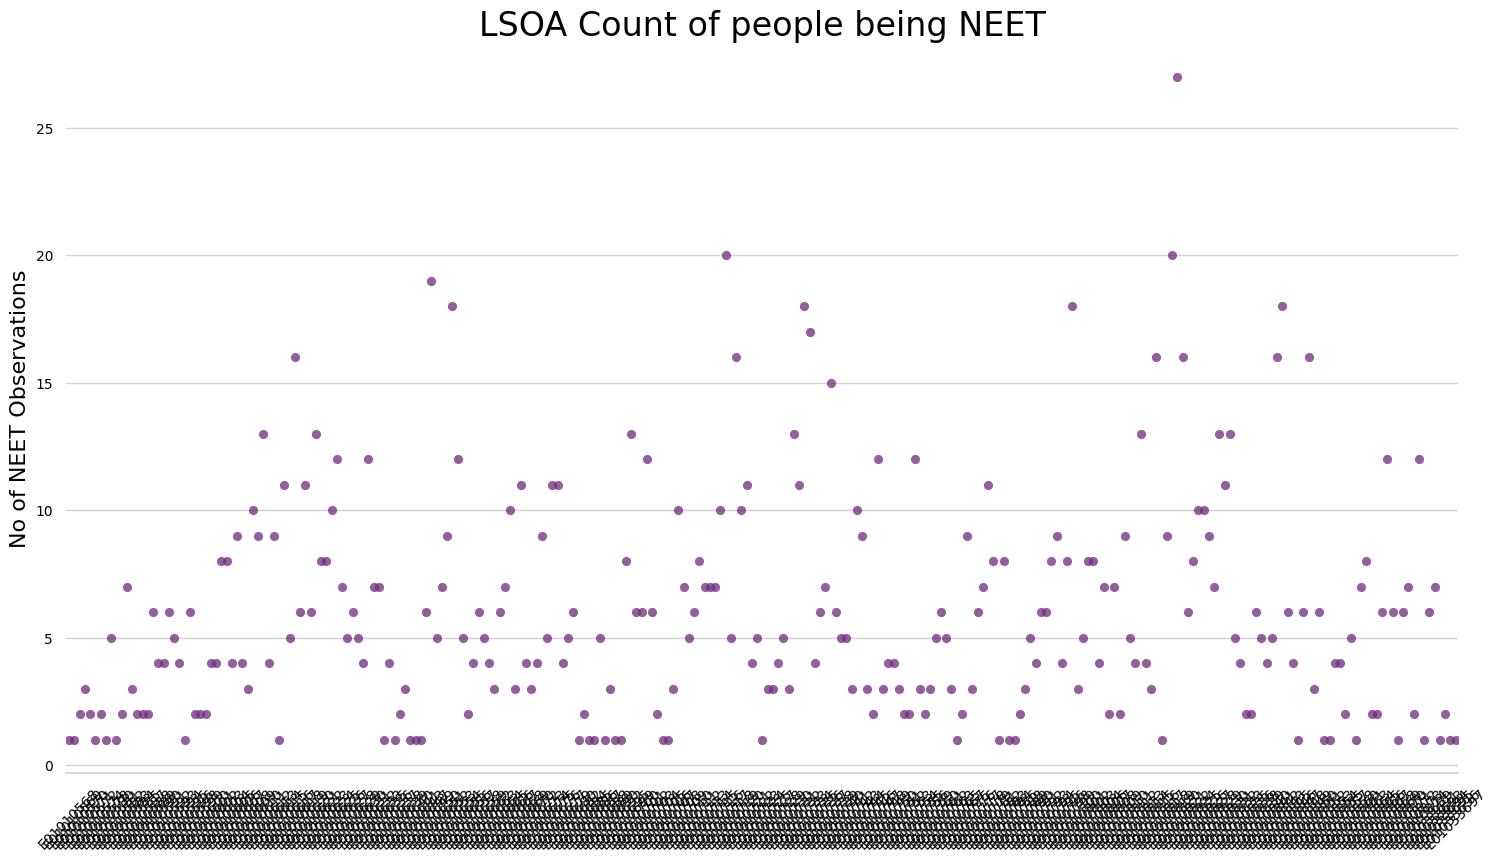

In [58]:
#for key in DataFrameDict.keys():
    
fig, ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.size'] = 6
    # Create swarm plot
sns.swarmplot(
    #data=DataFrameDict[key], 
    data=PersistantDFE16Brasfordgp,
    x='LSOA', 
    y='CountofPeople', 
    hue=None, 
    alpha=.75,
    color=pal_full[0],
    size=6.6,
    dodge=True
)

    # Chart formatting

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.set_title("LSOA Count of people being NEET", fontsize=24)
ax.set_ylabel("No of NEET Observations", fontsize=16)
ax.set_xlabel('', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
#ax.yaxis.set_major_formatter('{x:.0}')

sns.despine(left=True)
#plt.savefig(nccis.returnPlotLocation() + "NEET16to18/LSOA_Neet_Count_swarmplot_" + str(key), dpi=300)

plt.savefig(returnPlotLocation() + "PersistantNEET16to18/LSOA_Neet_Count_swarmplot", dpi=300)


In [60]:
# # Geometry cretion
# # Assign the geometry column as the active geometry

PersistantDFE16Brasfordgp['geometry'] = gpd.GeoSeries.from_wkt(PersistantDFE16Brasfordgp['geometry_home'], crs=4258)
gdf_NEET_by_lsoa = gpd.GeoDataFrame(PersistantDFE16Brasfordgp, geometry='geometry')
gdf_NEET_by_lsoa = gdf_NEET_by_lsoa.set_index('LSOA_name')

gdf_NEET_by_lsoa = gdf_NEET_by_lsoa.sort_values("LSOA")
gdf_NEET_by_lsoa

,LSOA,geometry_home,total_neet_observations,custody_offender_observations,status_unknown_observations,CountofPeople,NEETObservationRatio,CustodyOffenderRatio,StatusUnknownRatio,geometry
LSOA_name,,,,,,,,,,
Bradford 016A,E01010568,"POLYGON((-1.75223103716984 53.8503258605583, -...",5,0,0,1,5.000000,0.000000,0.000000,"POLYGON ((-1.75223 53.85033, -1.75294 53.85065..."
Bradford 016B,E01010569,"POLYGON((-1.76783482324601 53.8490572093718, -...",8,0,2,1,8.000000,0.000000,2.000000,"POLYGON ((-1.76783 53.84906, -1.76798 53.84912..."
Bradford 018A,E01010570,"POLYGON((-1.78862483951544 53.8504855511079, -...",15,2,4,2,7.500000,1.000000,2.000000,"POLYGON ((-1.78862 53.85049, -1.78935 53.85079..."
Bradford 016C,E01010571,"POLYGON((-1.76182748529313 53.8439194954512, -...",12,0,11,3,4.000000,0.000000,3.666667,"POLYGON ((-1.76183 53.84392, -1.76181 53.84397..."
Bradford 016D,E01010572,"POLYGON((-1.76418163133864 53.8487935123579, -...",13,0,26,2,6.500000,0.000000,13.000000,"POLYGON ((-1.76418 53.84879, -1.76421 53.84881..."
...,...,...,...,...,...,...,...,...,...,...
Bradford 039J,E01033693,"POLYGON((-1.75652766167913 53.8094317766972, -...",40,3,13,7,5.714286,0.428571,1.857143,"POLYGON ((-1.75653 53.80943, -1.75702 53.80992..."
Bradford 020F,E01033694,"POLYGON((-1.78454552564587 53.8394510677526, -...",5,0,1,1,5.000000,0.000000,1.000000,"POLYGON ((-1.78455 53.83945, -1.78474 53.83946..."
Bradford 049H,E01033695,"POLYGON((-1.81009521951767 53.7717765093753, -...",10,0,2,2,5.000000,0.000000,1.000000,"POLYGON ((-1.81010 53.77178, -1.81011 53.77187..."


In [61]:
# Draw the map for each LSOA in the dataframe
fig = px.choropleth_mapbox(gdf_NEET_by_lsoa,
                        geojson=gdf_NEET_by_lsoa.geometry,
                        locations=gdf_NEET_by_lsoa.index,
                        hover_data=['CountofPeople','LSOA'],
                        color="CountofPeople",
                        mapbox_style="carto-positron",
                        opacity=0.6,
                        color_continuous_scale="blackbody_r",
                        zoom=10.35,
                        center = {"lat": 53.7999, "lon": -1.7564},
                        width=1000,
                        height=900,
                        animation_frame = "LSOA",

)

fig.update_geos(fitbounds="locations", visible=False)

fig.update_traces(
    marker_line_width=0.7,
    marker_line_color="grey",
)


fig.update_layout(
    coloraxis_colorbar_title_text = 'Count of People',
    coloraxis_colorbar_tickformat="",
    title="Persistant NEET Count vs LSOA"
)

fig.write_html(returnPlotLocation() + "PersistantNEET16to18/maps/PersistantNEET16to18_lsoa.html")
fig.write_image(returnPlotLocation() + "PersistantNEET16to18/maps/PersistantNEET16to18_lsoa_plotly_map.svg")

fig.show()

MemoryError: 

## Simpson's Diversity Index is commonly used to measure the diversity of species in a biological community. However, it can be adapted to other contexts, including geographical areas like Lower Layer Super Output Areas (LSOAs). The formula for Simpson's Diversity Index is as follows:

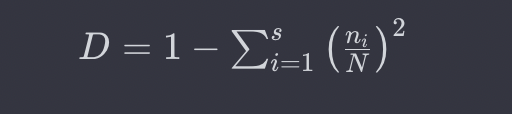


where:
D is the Simpson's Diversity Index,
s is the number of different types of LSOAs (species, in the ecological context),
n is the number of LSOAs of the i-th type,
N is the total number of LSOAs.
Here's how you can calculate Simpson's Diversity Index for geographical LSOA data:

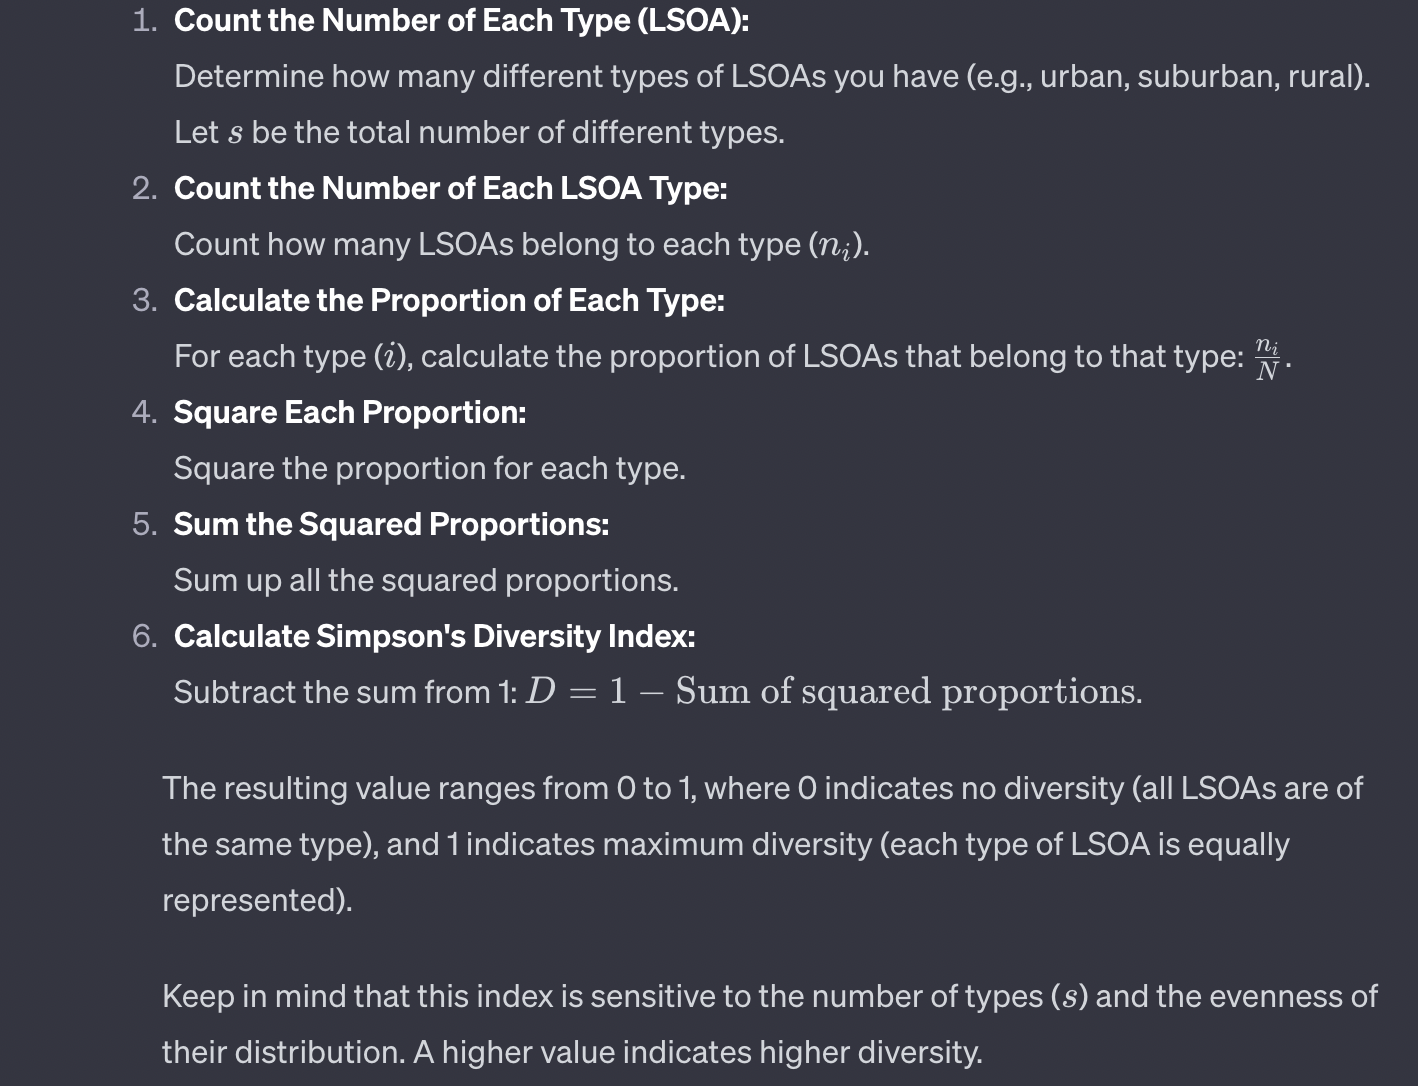


In [ ]:
censusRecordsPersistantNEET["LSOACount"] = censusRecordsPersistantNEET["LSOA"]
#censusRecordsPersistantNEET["CountofPeople"]=censusRecordsPersistantNEET["person_id"]

In [ ]:
simpsonDiversityIndexCalc = censusRecordsPersistantNEET.groupby(["LSOA"], as_index=False).agg({
        'LSOACount': 'count'})
simpsonDiversityIndexCalc

In [ ]:
# simpsonDiversityIndexCalc = censusRecordsPersistantNEET.groupby(["LSOA"], as_index=False).agg({
#         'LSOACount': 'count'})
# sDict = simpsonDiversityIndexCalc.to_dict(orient="records")
# sDict
#SDict = simpsonDiversityIndexCalc.to_dict('split')
#print(SDict['data'])

studentDict = simpsonDiversityIndexCalc.set_index('LSOA').to_dict()['LSOACount']



In [ ]:
def simpsons_diversity_index(data):

    """ Given a hash { 'species': count } , returns the Simpson Diversity Index
    
    >>> simpson_di({'a': 10, 'b': 20, 'c': 30,})
    0.3888888888888889
    """

    def p(n, N):
        """ Relative abundance """
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())
    
    return sum(p(n, N)**2 for n in data.values() if n is not 0)


def inverse_simpson_di(data):
    """ Given a hash { 'species': count } , returns the inverse Simpson Diversity Index
    
    >>> inverse_simpson_di({'a': 10, 'b': 20, 'c': 30,})
    2.571428571428571
    """
    return float(1)/simpsons_diversity_index(data)


diversity_index = simpsons_diversity_index(studentDict)
print(f"Simpson's Diversity Index: {diversity_index}")


# # Calculate Simpson's Diversity Index
# diversity_index = simpson()

# print(f"Simpson's Diversity Index: {diversity_index}")

<div class="alert alert-block alert-success">
<b> # Use these functions below to access the Dataframe of interest </b><br>
1. everNEETObservation<br>
2. PersistantNeetMoreThan12<br>
3. notInCensusPeople<br>
4. peopleNotInCensusLSOA15<br>
</div>